# Math 3080 Foundations of Data Science

In [144]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime
from datetime import date

Ford = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=F&outputsize=compact&apikey=ENIPDF3XPHW9IUUE&datatype=csv", delimiter=',')
Ford['timestamp'] = Ford['timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
Ford = Ford[(Ford['timestamp'] < datetime(2024,3,1)) & (Ford['timestamp'] >= datetime(2024,2,1))]
Ford = Ford.filter(['timestamp', 'close'])
Ford['DailyChange'] = Ford['close'].diff(-1)
Ford

,timestamp,close,DailyChange
13,2024-02-29,12.44,0.14
14,2024-02-28,12.30,0.30
15,2024-02-27,12.00,0.05
16,2024-02-26,11.95,-0.19
17,2024-02-23,12.14,0.02
18,2024-02-22,12.12,-0.02
19,2024-02-21,12.14,-0.11
20,2024-02-20,12.25,-0.05
21,2024-02-16,12.30,-0.22
22,2024-02-15,12.52,-0.04


In [145]:
Weather = pd.read_csv("https://raw.githubusercontent.com/drolsonmi/math3080/main/Datasets/DetroitWx_Feb2024.csv", delimiter=',', skiprows=5)
Weather.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], axis=1, inplace=True)
Weather.columns = ['Year', 'Month', 'Day', 'Max', 'Min', 'Hail', 'Snow', 'Evap.(in)']
Weather.drop(['Hail', 'Snow', 'Evap.(in)'], axis=1, inplace=True)
Weather['Timestamp'] = pd.to_datetime(Weather[['Year', 'Month', 'Day']])
Weather

,Year,Month,Day,Max,Min,Timestamp
0,2024,2,1,45,36,2024-02-01
1,2024,2,2,42,29,2024-02-02
2,2024,2,3,36,26,2024-02-03
3,2024,2,4,49,o,2024-02-04
4,2024,2,5,39,26,2024-02-05
5,2024,2,6,43,28,2024-02-06
6,2024,2,7,48,26,2024-02-07
7,2024,2,8,61,33,2024-02-08
8,2024,2,9,64,49,2024-02-09
9,2024,2,10,53,33,2024-02-10


In [146]:
CombinedData = pd.merge(Weather, Ford, how='inner', left_on='Timestamp', right_on='timestamp')
CombinedData.drop('timestamp', axis=1, inplace=True)
CombinedData.dropna(inplace=True)
# CombinedData.drop('o', axis=1, inplace=True)
# average = CombinedData['close'].mean()
# CombinedData['close'].fillna(value=average, inplace=True)
# CombinedData['DailyChange'] = CombinedData['close'].diff()

CombinedData

,Year,Month,Day,Max,Min,Timestamp,close,DailyChange
1,2024,2,2,42,29,2024-02-02,12.14,0.04
2,2024,2,5,39,26,2024-02-05,11.59,-0.55
3,2024,2,6,43,28,2024-02-06,12.07,0.48
4,2024,2,7,48,26,2024-02-07,12.80,0.73
5,2024,2,8,61,33,2024-02-08,12.83,0.03
6,2024,2,9,64,49,2024-02-09,12.68,-0.15
7,2024,2,12,42,27,2024-02-12,12.98,0.30
8,2024,2,13,36,25,2024-02-13,12.68,-0.30
9,2024,2,14,39,28,2024-02-14,12.56,-0.12
10,2024,2,15,40,29,2024-02-15,12.52,-0.04


In [147]:
CombinedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1 to 19
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         19 non-null     int64         
 1   Month        19 non-null     int64         
 2   Day          19 non-null     int64         
 3   Max          19 non-null     int64         
 4   Min          19 non-null     object        
 5   Timestamp    19 non-null     datetime64[ns]
 6   close        19 non-null     float64       
 7   DailyChange  19 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.3+ KB


In [148]:
CombinedData.describe()

,Year,Month,Day,Max,Timestamp,close,DailyChange
count,19.0,19.0,19.000000,19.000000,19,19.000000,19.000000
mean,2024.0,2.0,15.947368,49.052632,2024-02-15 22:44:12.631578880,12.341579,0.017895
min,2024.0,2.0,2.000000,31.000000,2024-02-02 00:00:00,11.590000,-0.550000
25%,2024.0,2.0,8.500000,39.500000,2024-02-08 12:00:00,12.130000,-0.135000
50%,2024.0,2.0,15.000000,47.000000,2024-02-15 00:00:00,12.300000,-0.020000
75%,2024.0,2.0,22.500000,58.000000,2024-02-22 12:00:00,12.620000,0.095000
max,2024.0,2.0,29.000000,73.000000,2024-02-29 00:00:00,12.980000,0.730000
std,0.0,0.0,8.501462,11.578110,NaN,0.354812,0.287973


In [149]:
CombinedData.value_counts()

Year  Month  Day  Max  Min  Timestamp   close  DailyChange
2024  2      2    42   29   2024-02-02  12.14   0.04          1
             16   31   24   2024-02-16  12.30  -0.22          1
             28   64   22   2024-02-28  12.30   0.30          1
             27   73   43   2024-02-27  12.00   0.05          1
             26   55   36   2024-02-26  11.95  -0.19          1
             23   54   25   2024-02-23  12.14   0.02          1
             22   54   37   2024-02-22  12.12  -0.02          1
             21   61   28   2024-02-21  12.14  -0.11          1
             20   47   23   2024-02-20  12.25  -0.05          1
             15   40   29   2024-02-15  12.52  -0.04          1
             5    39   26   2024-02-05  11.59  -0.55          1
             14   39   28   2024-02-14  12.56  -0.12          1
             13   36   25   2024-02-13  12.68  -0.30          1
             12   42   27   2024-02-12  12.98   0.30          1
             9    64   49   2024-02-09  12.68

In [150]:
print(CombinedData.corr())

             Year  Month       Day       Max       Min  Timestamp     close  \
Year          NaN    NaN       NaN       NaN       NaN        NaN       NaN   
Month         NaN    NaN       NaN       NaN       NaN        NaN       NaN   
Day           NaN    NaN  1.000000  0.374235 -0.047230   1.000000 -0.217115   
Max           NaN    NaN  0.374235  1.000000  0.610488   0.374235 -0.099825   
Min           NaN    NaN -0.047230  0.610488  1.000000  -0.047230 -0.021580   
Timestamp     NaN    NaN  1.000000  0.374235 -0.047230   1.000000 -0.217115   
close         NaN    NaN -0.217115 -0.099825 -0.021580  -0.217115  1.000000   
DailyChange   NaN    NaN -0.039306  0.149330 -0.156543  -0.039306  0.394232   

             DailyChange  
Year                 NaN  
Month                NaN  
Day            -0.039306  
Max             0.149330  
Min            -0.156543  
Timestamp      -0.039306  
close           0.394232  
DailyChange     1.000000  


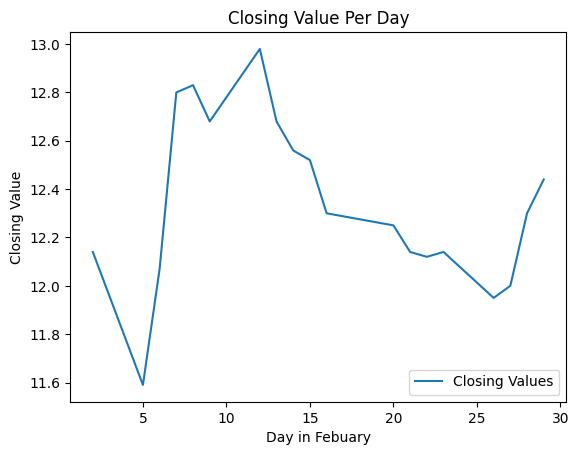

In [151]:
fig, ax = plt.subplots()

sns.lineplot(data=CombinedData, x=CombinedData['Day'], y=CombinedData['close'], label='Closing Values')

ax.set_ylabel('Closing Value')
ax.set_xlabel('Day in Febuary')
ax.set_title('Closing Value Per Day')
ax.legend(loc='lower right')

Text(0, 0.5, 'Max temp in F')

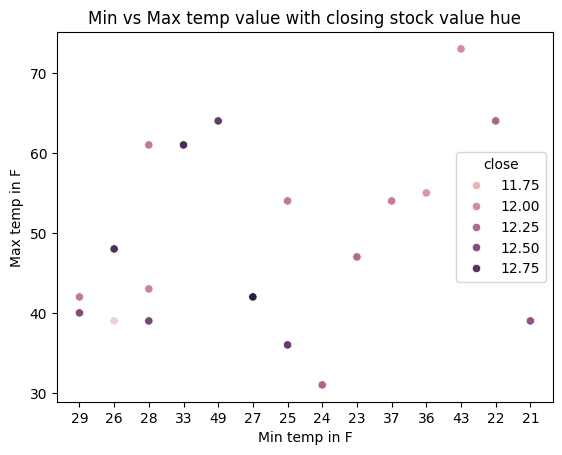

In [152]:
fig, ax = plt.subplots()

sns.scatterplot(data=CombinedData, x='Min', y='Max', hue='close')

plt.title('Min vs Max temp value with closing stock value hue')
plt.xlabel('Min temp in F')
plt.ylabel('Max temp in F')

# Conclusion
- After cleaning and working my way throught the data there didn't seem to be much of a coreelation between the weather for a day and the closing cost of the stock of ford. In terms of number correlation there was a -.02 for the max temp and a -.21 for the min temp. The first graph above shows that the largest jump in closing cost for a day was 1.2 which is a decent size jump when you look at the average cost of the stock as being 12.34 but there is no evidence that this was caused by the change in temperature. The second graph shows that there is even less correlation between them as it graphs the min vs the max temp of the day and then has a hue on it to show what the closing cost was and the dots are all over the place and dont show that there is a tight spread. There also isn't a clump of dots that have similar colors to show that there is some correlation between having that closing cost and being on that day. 